```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

```

# Univariate Function Optimization
`Univariate function optimization` involves finding the input to a function that results in the optimal output from an objective function. This is a common procedure in machine learning when fitting a model with one parameter or tuning a model that has a single hyperparameter.

- Univariate Function Optimization
- Convex Univariate Function Optimization
- Non-Convex Univariate Function Optimization

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Univariate Function Optimization
We may need to find an optimal value of a function that takes a single parameter.

In machine learning, this may occur in many situations, such as:

- Finding the coefficient of a model to fit to a training dataset.
- Finding the value of a single hyperparameter that results in the best model performance.

This is called `univariate function optimization`.

We may be interested in the minimum outcome or maximum outcome of the function, although this can be simplified to minimization as a maximizing function can be made minimizing by adding a negative sign to all outcomes of the function.

There may or may not be limits on the inputs to the function, so-called `unconstrained or constrained optimization`, and we assume that small changes in input correspond to small changes in the output of the function, e.g. that it is smooth.

The function may or may not have a single optima, although we prefer that it does have a single optima and that shape of the function looks like a large basin. If this is the case, we know we can sample the function at one point and find the path down to the minima of the function. Technically, this is referred to as a `convex function` ([link](https://en.wikipedia.org/wiki/Convex_function)) for minimization (`concave` for maximization), and functions that don’t have this basin shape are referred to as `non-convex`. 

<img src="images/ConvexFunction.svg" alt="" style="width: 600px;"/>

**Convex Target Function:** There is a single optima and the shape of the target function leads to this optima. Nevertheless, the target function is sufficiently complex that we don’t know the derivative, meaning we cannot just use calculus to analytically compute the minimum or maximum of the function where the gradient is zero. This is referred to as a `function that is non-differentiable`.

Although we might be able to sample the function with candidate values, we don’t know the input that will result in the best outcome. This may be because of the many reasons it is expensive to evaluate candidate solutions.

Therefore, we require an algorithm that efficiently samples input values to the function.

One approach to solving univariate function optimization problems is to use [Brent’s method](https://en.wikipedia.org/wiki/Brent%27s_method). `Brent’s method` is an optimization algorithm that combines a bisecting algorithm (Dekker’s method) and [inverse quadratic interpolation](https://en.wikipedia.org/wiki/Inverse_quadratic_interpolation). It can be used for constrained and unconstrained univariate function optimization. Brent’s method modifies Dekker’s method to avoid getting stuck and also approximates the second derivative of the objective function (called the [Secant Method](https://en.wikipedia.org/wiki/Secant_method)) in an effort to accelerate the search. As such, Brent’s method for univariate function optimization is generally preferred over most other univariate function optimization algorithms given its efficiency.

`Brent’s method` is available in Python via the `minimize_scalar()` [SciPy function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) that takes the name of the function to be minimized. If your target function is constrained to a range, it can be specified via the “bounds” argument. It returns an [OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html) object that is a dictionary containing the solution. Importantly, the ‘x‘ key summarizes the input for the optima, the ‘fun‘ key summarizes the function output for the optima, and the ‘nfev‘ summarizes the number of evaluations of the target function that were performed.

## Convex Univariate Function Optimization
In this section, we will solve a convex univariate function optimization problem.

First, we can define a function that implements our function.

In this case, we will use a simple offset version of the x^2 function e.g. a simple [parabola](https://en.wikipedia.org/wiki/Parabola) (u-shape) function.

<img src="images/Parts_of_Parabola.svg" alt="" style="width: 400px;"/>

In our case it is a minimization objective function with an optima at -5.0 (not like in the picture above which has an optima at 1).

In [4]:
# objective function
def objective(x):
    return (5.0 + x)**2.0

We can plot a coarse grid of this function with input values from -10 to 10 to get an idea of the shape of the target function.

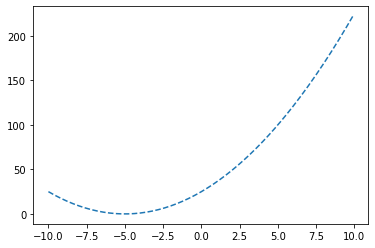

In [8]:
# Line Plot of a Convex Objective Function

# define range
r_min, r_max = -10.0, 10.0

# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)

# compute targets
targets = [objective(x) for x in inputs]

# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.show()

Running the example evaluates input values in our specified range using our target function and creates a plot of the function inputs to function outputs.

We can see the U-shape of the function and that the objective is at -5.0.

Note: in a real optimization problem, we would not be able to perform so many evaluations of the objective function so easily. This simple function is used for demonstration purposes so we can learn how to use the optimization algorithm.

Next, we can use the optimization algorithm to find the optima.

In [11]:
from scipy.optimize import minimize_scalar

# minimize the function
result = minimize_scalar(objective, method='brent')
result

     fun: 3.1554436208840472e-30
    nfev: 10
     nit: 4
 success: True
       x: -4.999999999999998

Once optimized, we can summarize the result, including the input and evaluation of the optima and the number of function evaluations required to locate the optima.

In [23]:
# summarize the result
opt_x, opt_y = result['x'], result['fun']
print(f'Optimal Input x: {opt_x:.6f}')
print(f'Optimal Output f(x): {opt_y:.6f}')
print(f'Total Evaluations n: {result["nfev"]:d}')

Optimal Input x: -5.000000
Optimal Output f(x): 0.000000
Total Evaluations n: 10


In this case, we can see that the optima was located after 10 evaluations of the objective function with an input of -5.0, achieving an objective function value of 0.0.

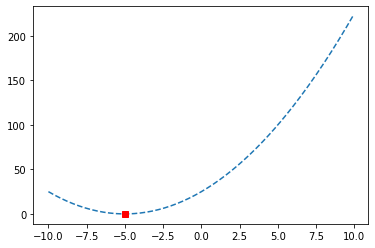

In [26]:
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)

# compute targets
targets = [objective(x) for x in inputs]

# plot inputs vs target
plt.plot(inputs, targets, '--')

# plot the optima
plt.plot([opt_x], [opt_y], 's', color='r')

# show the plot
plt.show()

## Non-Convex Univariate Function Optimization
A `non-convex function` is one that does not resemble a basin, meaning that it may have more than one hill or valley.

This can make it more challenging to locate the global optima as the multiple hills and valleys can cause the search to get stuck and report a false or local optima instead.

We can define a non-convex univariate function as follows:

In [28]:
# objective function
def objective2(x):
    return (x - 2.0) * x * (x + 2.0)**2.0

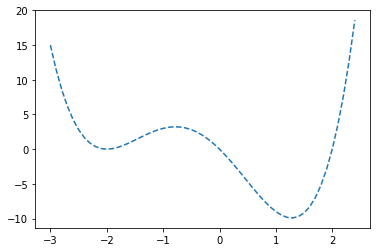

In [30]:
# Line Plot of a Non-Convex Objective Function

# define range
r_min, r_max = -3.0, 2.5

# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)

# compute targets
targets = [objective2(x) for x in inputs]

# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.show()

We can see a function with one false optima around -2.0 and a global optima around 1.2.

Note: in a real optimization problem, we would not be able to perform so many evaluations of the objective function so easily. This simple function is used for demonstration purposes so we can learn how to use the optimization algorithm.

Next, we can use the optimization algorithm to find the optima.

As before, we can call the` minimize_scalar()` function to optimize the function, then summarize the result and plot the optima on a line plot.

In [32]:
# minimize the function
result = minimize_scalar(objective2, method='brent')
result

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

In [33]:
# minimize the function
result = minimize_scalar(objective2, method='brent')

# summarize the result
opt_x, opt_y = result['x'], result['fun']
print(f'Optimal Input x: {opt_x:.6f}')
print(f'Optimal Output f(x): {opt_y:.6f}')
print(f'Total Evaluations n: {result["nfev"]:d}')

Optimal Input x: 1.280776
Optimal Output f(x): -9.914950
Total Evaluations n: 15


In this case, we can see that the optima was located after 15 evaluations of the objective function with an input of about 1.28, achieving an objective function value of about -9.91.

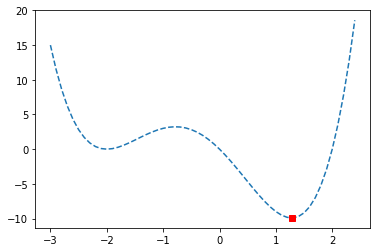

In [34]:
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)

# compute targets
targets = [objective2(x) for x in inputs]

# plot inputs vs target
plt.plot(inputs, targets, '--')

# plot the optima
plt.plot([opt_x], [opt_y], 's', color='r')

# show the plot
plt.show()

We can see that the optimization was not deceived by the false optima and successfully located the global optima.